# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

amount 20, sigma 2


(<Axes: >, <matplotlib.image.AxesImage at 0x29f474b10>)

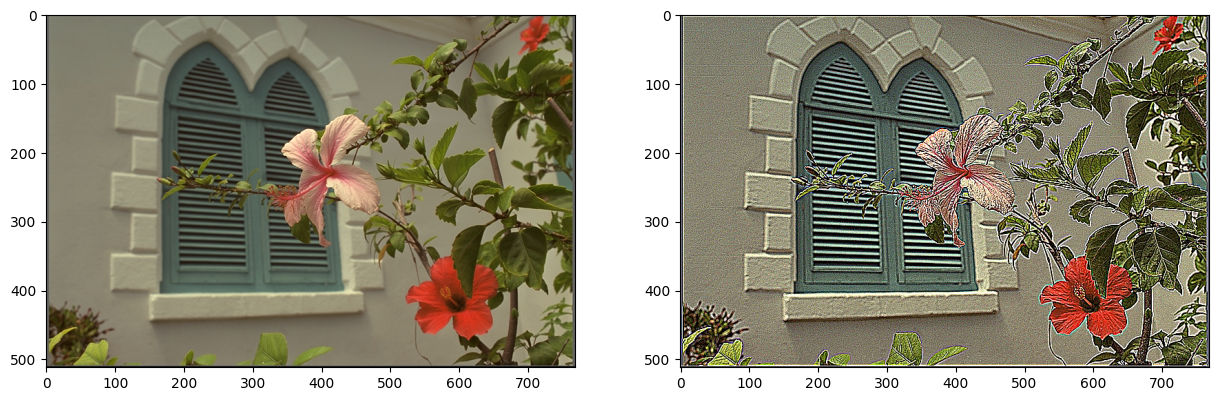

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

img = cv2.imread('data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

sigma = 2
original = np.float32(img)

unsharp = cv2.GaussianBlur(img, (3,3), sigmaX=sigma)

diff = original - unsharp

amount = 20
sharpened = original + diff * amount

sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

print(f'amount {amount}, sigma {sigma}')

# plt.subplot(221), plt.imshow(img)
# plt.subplot(222), plt.imshow(unsharp)
# plt.subplot(223), plt.imshow(diff)
# plt.subplot(224), plt.imshow(sharpened)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

1) Judging by test results, reasonable value for amount is in range [1, 5]. 
2) In case if amount is too small, image is blurred
3) In case if amout is too large, image is becoming noisy, visual size of edges gets bigger.